### (1) II. 데이터 셋에서 주어진 특징들을 선택하여 CPU 성능 즉, “PRP” 변수를 예측하는 LinearRegression 기반 다중 선형 회귀 모델링을 프로그래밍 하시오.
- 데이터 탐색 및 시각화, 전처리, 훈련 데이터와 테스트 데이터 분리, 훈련 데이터 학습과정, 교차 검증, 분석 결과 시각화 등을 포함하여 최적화하는 전체 과정을 포함하시오.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   VendorName  209 non-null    object
 1   ModelName   209 non-null    object
 2   MYCT        209 non-null    int64 
 3   MMIN        209 non-null    int64 
 4   MMAX        209 non-null    int64 
 5   CACH        209 non-null    int64 
 6   CHMIN       209 non-null    int64 
 7   CHMAX       209 non-null    int64 
 8   PRP         209 non-null    int64 
 9   ERP         209 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 16.5+ KB
None
VendorName 결측값 개수: 0
ModelName 결측값 개수: 0
MYCT 결측값 개수: 0
MMIN 결측값 개수: 0
MMAX 결측값 개수: 0
CACH 결측값 개수: 0
CHMIN 결측값 개수: 0
CHMAX 결측값 개수: 0
PRP 결측값 개수: 0
ERP 결측값 개수: 0
           MYCT      MMIN      MMAX      CACH     CHMIN     CHMAX       PRP
MYCT   1.000000 -0.335642 -0.378561 -0.321000 -0.301090 -0.250502 -0.307099
MMIN  -0.335642  1.000000  0.758157  0.534729 

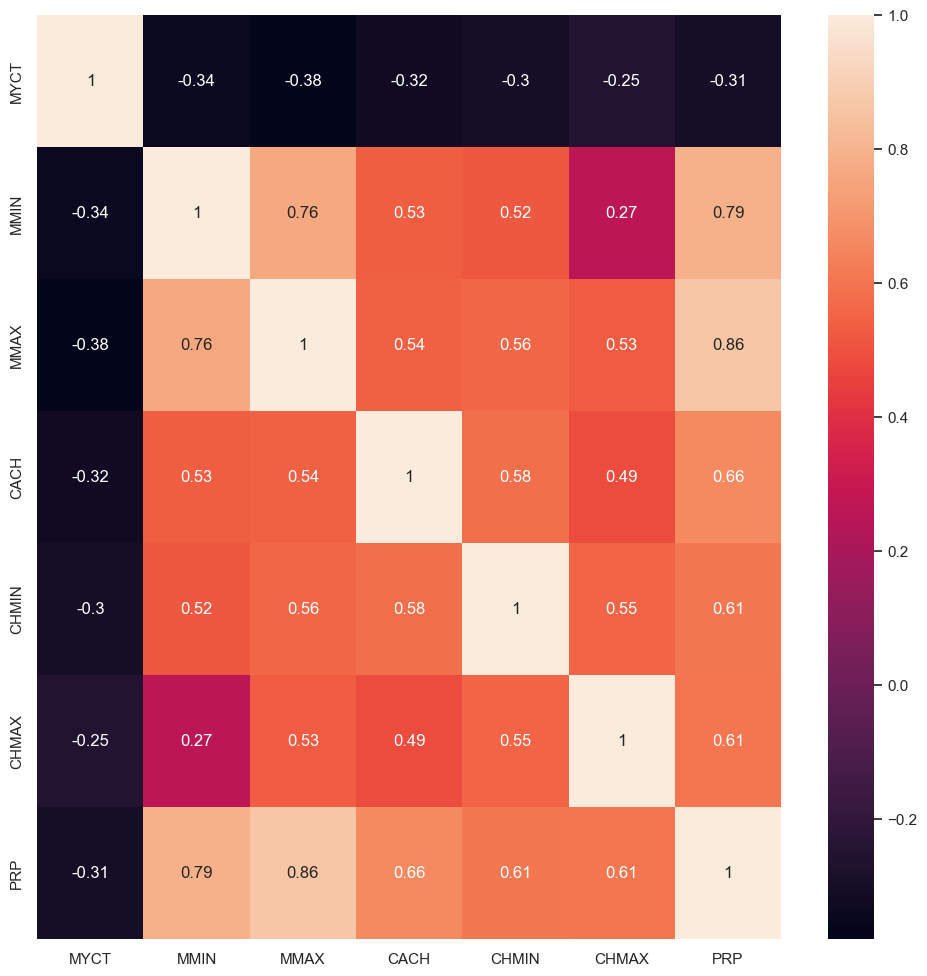

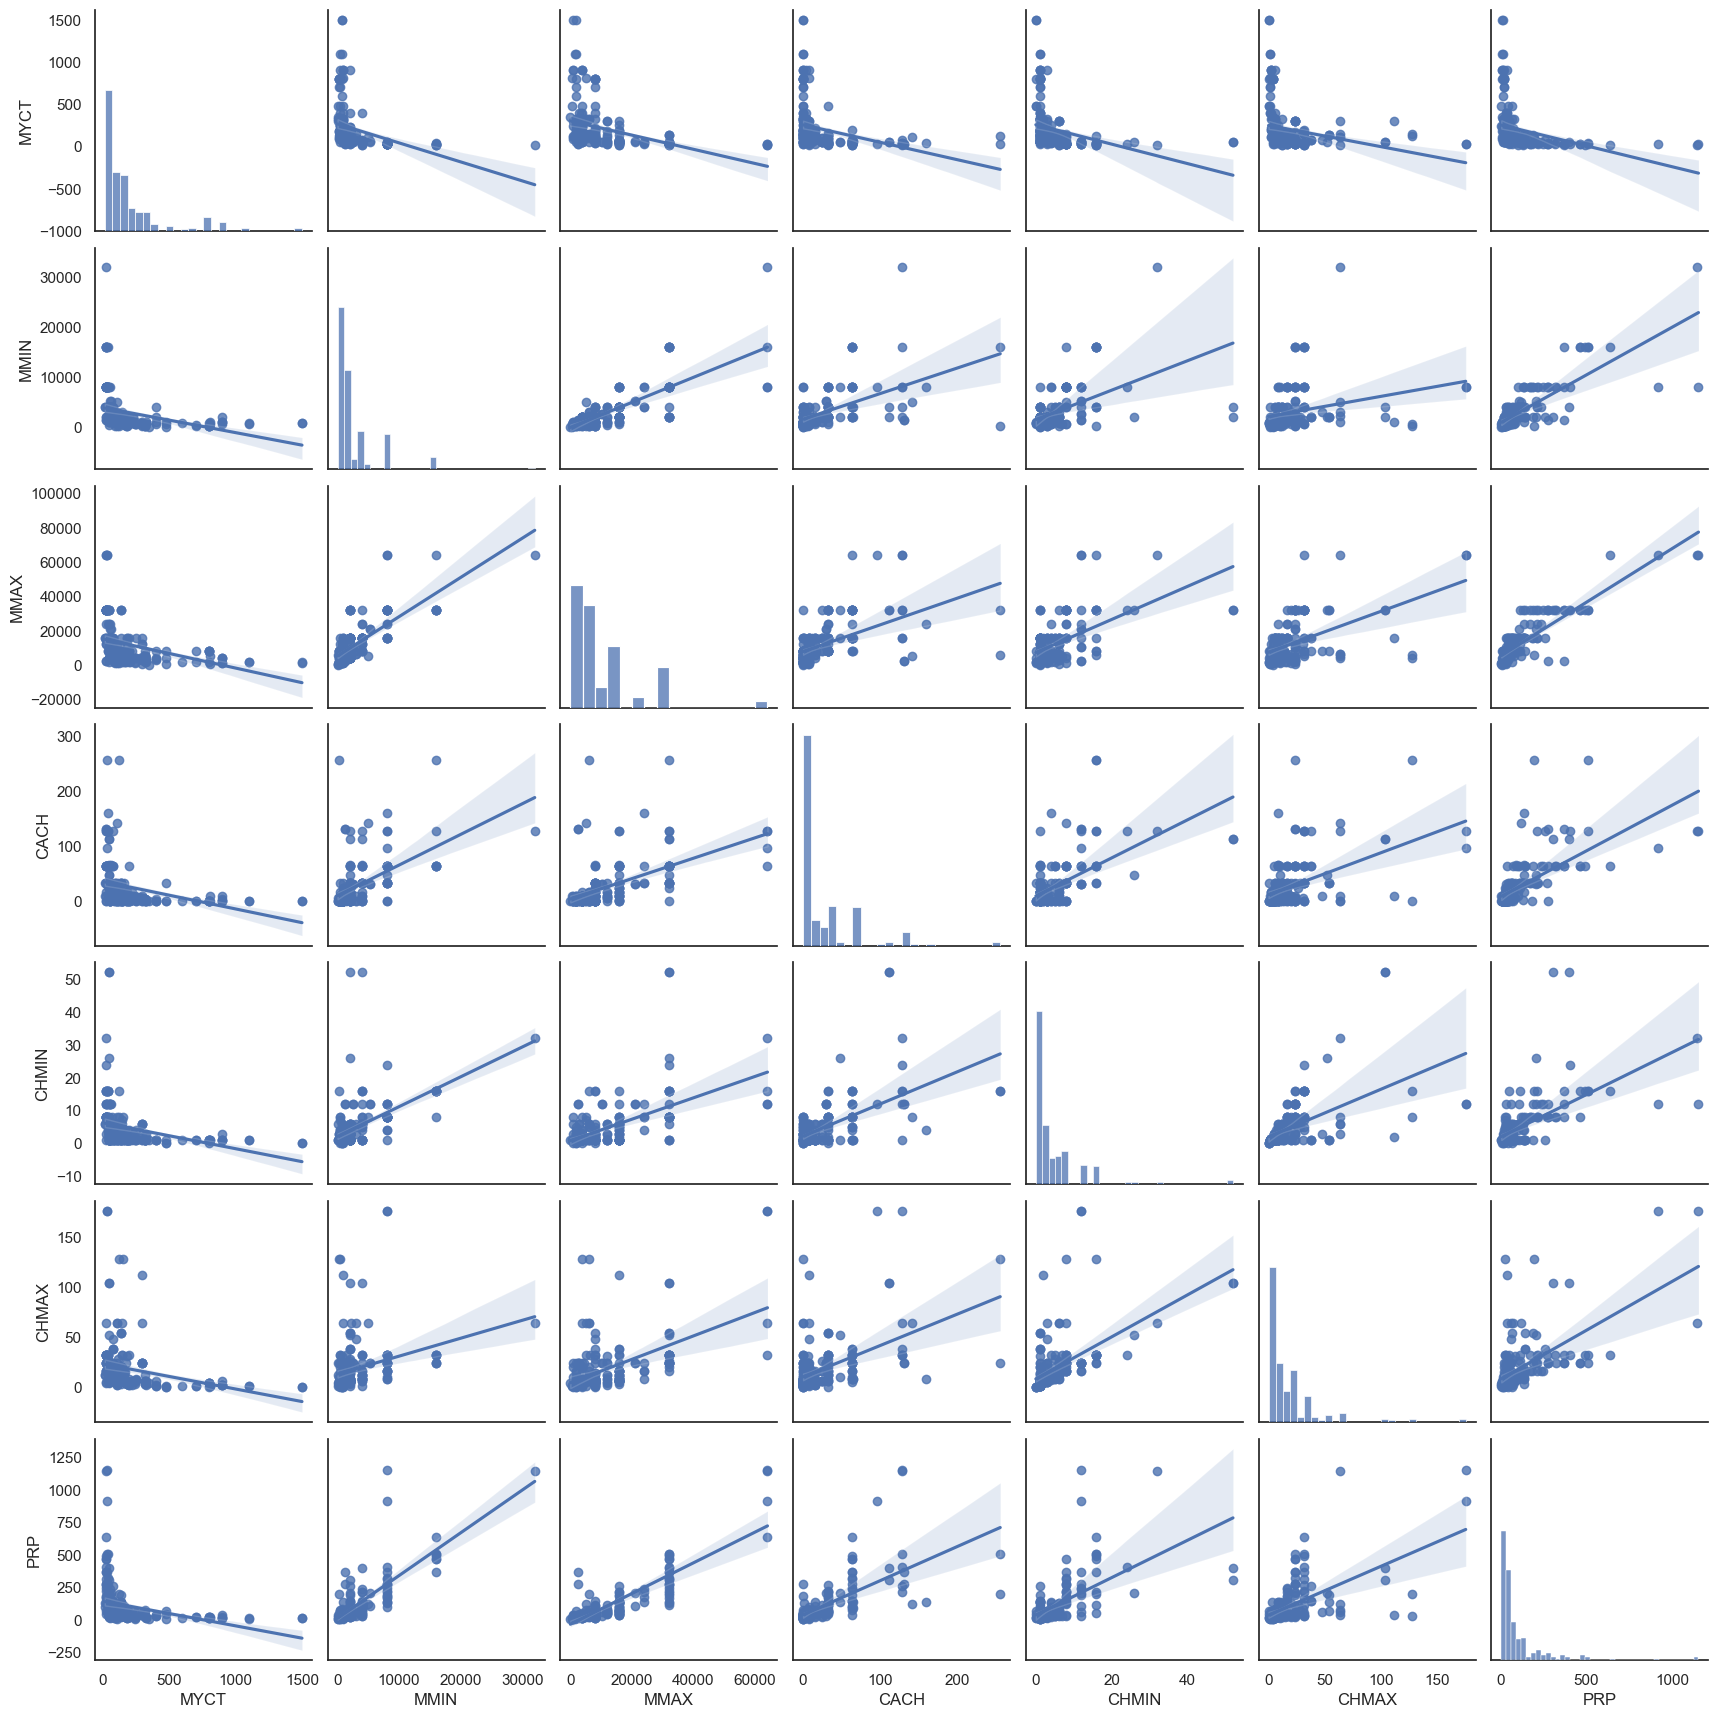

       MYCT      MMIN      MMAX   CACH     CHMIN     CHMAX       PRP
0  0.072825  0.006012  0.092843  1.000  0.307692  0.727273  0.167832
1  0.008092  0.248497  0.499499  0.125  0.153846  0.181818  0.229895
2  0.008092  0.248497  0.499499  0.125  0.153846  0.181818  0.187063
3  0.008092  0.248497  0.499499  0.125  0.153846  0.181818  0.145105
4  0.008092  0.248497  0.249249  0.125  0.153846  0.090909  0.110140
교차검증 RMSE: [0.21164906 0.28367681 0.19838803 0.27529504 0.27613554]
Mean Squared Error: 0.0039608058937335615
Mean Absolute Error: 0.030208459097094947
R²: 0.8186778775733226


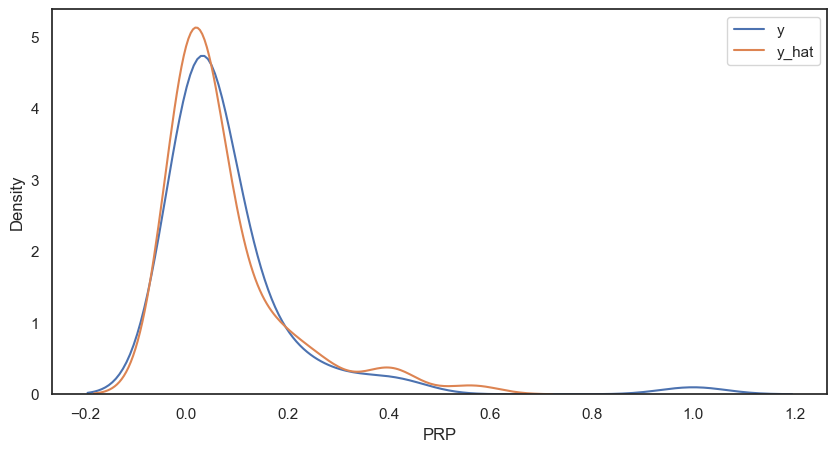

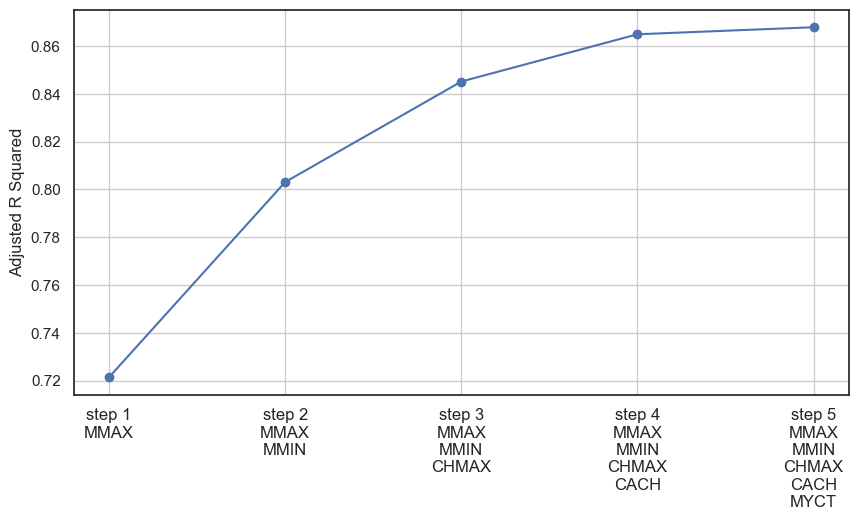

선택된 변수: ['MMAX', 'MMIN', 'CHMAX', 'CACH', 'MYCT']
R² after feature selection: 0.8274444757467745


In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm

# 데이터 로드
dt = pd.read_csv('machine_data.csv')

# 데이터 정보 출력
print(dt.info())

# 결측값 확인
for column in dt.columns:
    print(f"{column} 결측값 개수: {dt[column].isna().sum()}")

# 상관 관계 분석
feature = dt.columns[2:9]
cor = dt[feature].corr()
print(cor)

# 데이터 시각화
sns.set(style='white')
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(cor, annot=True, ax=ax)
plt.show()

sns.pairplot(dt[feature], kind='reg')
plt.show()

# 데이터 전처리 및 정규화
dt_md = dt[feature]
mMscaler = MinMaxScaler()
mMscaler.fit(dt_md)
mMscaled_data = mMscaler.transform(dt_md)
dt_md_scaled = pd.DataFrame(mMscaled_data, columns=feature)
print(dt_md_scaled.head())

# 데이터 분리 (훈련 데이터와 테스트 데이터 분리)
X = dt_md_scaled[dt_md_scaled.columns[:-1]]
y = dt_md_scaled['PRP']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# 모델 학습 (훈련 데이터 학습과정)
md_reg = LinearRegression()
md_reg.fit(X_train, y_train)

# 예측 및 평가 (교차 검증)
y_hat = md_reg.predict(X)
y_hat_test = md_reg.predict(X_test)
cv_scores = cross_val_score(md_reg, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
rmse_scores = np.sqrt(-1 * cv_scores)

print(f"교차검증 RMSE: {rmse_scores}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_hat_test)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_hat_test)}")
print(f"R²: {r2_score(y_test, y_hat_test)}")

# 분석 결과 시각화
plt.figure(figsize=(10, 5))
ax1 = sns.kdeplot(y_test, label="y")
ax2 = sns.kdeplot(y_hat_test, label='y_hat', ax=ax1)
plt.legend()
plt.show()

# 단계적 변수 선택 (모델 개선)
def stepwise_feature_selection(X_train, y_train, variables=X_train.columns.tolist()):
    y = y_train 
    selected_variables = []  
    sl_enter = 0.05
    sl_remove = 0.05
    
    sv_per_step = [] 
    adjusted_r_squared = [] 
    steps = [] 
    step = 0
    while len(variables) > 0:
        remainder = list(set(variables) - set(selected_variables))
        pval = pd.Series(index=remainder) 
        
        for col in remainder: 
            X = X_train[selected_variables + [col]]
            X = sm.add_constant(X)
            model = sm.OLS(y, X).fit(disp=0)
            pval[col] = model.pvalues[col]
    
        min_pval = pval.min()
        if min_pval < sl_enter: 
            selected_variables.append(pval.idxmin())
            
            while len(selected_variables) > 0:
                selected_X = X_train[selected_variables]
                selected_X = sm.add_constant(selected_X)
                selected_pval = sm.OLS(y, selected_X).fit(disp=0).pvalues[1:] 
                max_pval = selected_pval.max()
                if max_pval >= sl_remove: 
                    remove_variable = selected_pval.idxmax()
                    selected_variables.remove(remove_variable)
                else:
                    break
            
            step += 1
            steps.append(step)
            adj_r_squared = sm.OLS(y, sm.add_constant(X_train[selected_variables])).fit(disp=0).rsquared_adj
            adjusted_r_squared.append(adj_r_squared)
            sv_per_step.append(selected_variables.copy())
        else:
            break

    fig = plt.figure(figsize=(10, 5))
    fig.set_facecolor('white')
    font_size = 12
    plt.xticks(steps, [f'step {s}\n' + '\n'.join(sv_per_step[i]) for i, s in enumerate(steps)], fontsize=12)
    plt.plot(steps, adjusted_r_squared, marker='o')
    plt.ylabel('Adjusted R Squared', fontsize=font_size)
    plt.grid(True)
    plt.show()

    return selected_variables

selected_variables = stepwise_feature_selection(X_train, y_train)
print(f"선택된 변수: {selected_variables}")

# 선택된 변수로 모델 재학습 및 평가 (최적화)
X = dt_md_scaled[selected_variables]
y = dt_md_scaled['PRP']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
md_reg.fit(X_train, y_train)
y_hat_test = md_reg.predict(X_test)
print(f"R² after feature selection: {r2_score(y_test, y_hat_test)}")


### (2) (1) 단계에서 얻은 다중 선형 회귀 모델을 사용하여 학습 데이터와 테스트 데이터 각각에 대해 이 모델의 성능을 평가하시오. 
- Mean squared Error, Mean absolute Error, R^2, 교차검증

교차검증 RMSE: [0.21164906 0.28367681 0.19838803 0.27529504 0.27613554]
Mean Squared Error: 0.0039608058937335615
Mean Absolute Error: 0.030208459097094947
R²: 0.8186778775733226


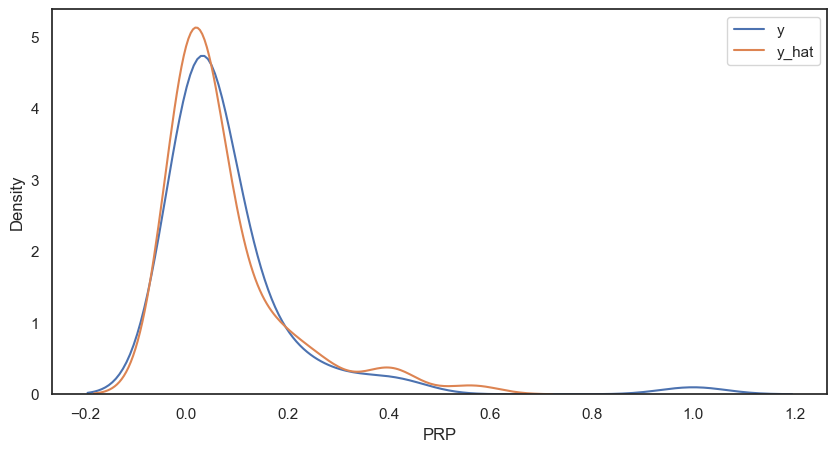

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 분리
X = dt_md_scaled[dt_md_scaled.columns[:-1]]
y = dt_md_scaled['PRP']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# 선형 회귀 모델 학습
md_reg = LinearRegression()
md_reg.fit(X_train, y_train)

# 예측 및 평가
y_hat = md_reg.predict(X)
y_hat_test = md_reg.predict(X_test)
cv_scores = cross_val_score(md_reg, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
rmse_scores = np.sqrt(-1 * cv_scores)

# 성능 평가 지표 출력 (Mean Squared Error, Mean Absolute Error, R^2, 교차검증)
print(f"교차검증 RMSE: {rmse_scores}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_hat_test)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_hat_test)}")
print(f"R²: {r2_score(y_test, y_hat_test)}")

# 결과 시각화
plt.figure(figsize=(10, 5))
ax1 = sns.kdeplot(y_test, label="y")
ax2 = sns.kdeplot(y_hat_test, label='y_hat', ax=ax1)
plt.legend()
plt.show()


### (3) (2) 단계에서 얻은 모델의 테스트 데이터에 대해 R^2가 90% 이상이 나오도록 모델을 개선하시오.

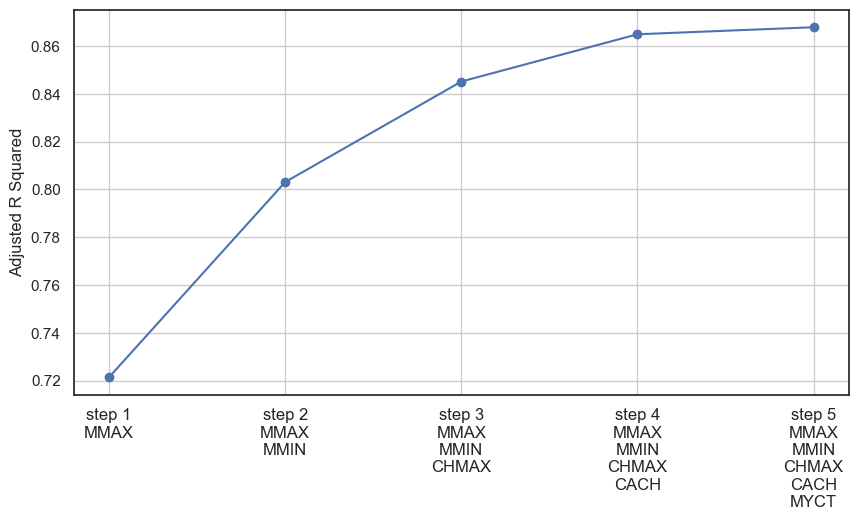

선택된 변수: ['MMAX', 'MMIN', 'CHMAX', 'CACH', 'MYCT']
R² after feature selection: 0.8274444757467745


In [12]:
import statsmodels.api as sm
import pandas as pd

# 단계적 변수 선택 (모델 개선)
def stepwise_feature_selection(X_train, y_train, variables=X_train.columns.tolist()):
    y = y_train 
    selected_variables = []  
    sl_enter = 0.05
    sl_remove = 0.05
    
    sv_per_step = [] 
    adjusted_r_squared = [] 
    steps = [] 
    step = 0
    while len(variables) > 0:
        remainder = list(set(variables) - set(selected_variables))
        pval = pd.Series(index=remainder) 
        
        for col in remainder: 
            X = X_train[selected_variables + [col]]
            X = sm.add_constant(X)
            model = sm.OLS(y, X).fit(disp=0)
            pval[col] = model.pvalues[col]
    
        min_pval = pval.min()
        if min_pval < sl_enter: 
            selected_variables.append(pval.idxmin())
            
            while len(selected_variables) > 0:
                selected_X = X_train[selected_variables]
                selected_X = sm.add_constant(selected_X)
                selected_pval = sm.OLS(y, selected_X).fit(disp=0).pvalues[1:] 
                max_pval = selected_pval.max()
                if max_pval >= sl_remove: 
                    remove_variable = selected_pval.idxmax()
                    selected_variables.remove(remove_variable)
                else:
                    break
            
            step += 1
            steps.append(step)
            adj_r_squared = sm.OLS(y, sm.add_constant(X_train[selected_variables])).fit(disp=0).rsquared_adj
            adjusted_r_squared.append(adj_r_squared)
            sv_per_step.append(selected_variables.copy())
        else:
            break

    fig = plt.figure(figsize=(10, 5))
    fig.set_facecolor('white')
    font_size = 12
    plt.xticks(steps, [f'step {s}\n' + '\n'.join(sv_per_step[i]) for i, s in enumerate(steps)], fontsize=12)
    plt.plot(steps, adjusted_r_squared, marker='o')
    plt.ylabel('Adjusted R Squared', fontsize=font_size)
    plt.grid(True)
    plt.show()

    return selected_variables

selected_variables = stepwise_feature_selection(X_train, y_train)
print(f"선택된 변수: {selected_variables}")

# 선택된 변수로 모델 재학습 및 평가 (최적화)
X = dt_md_scaled[selected_variables]
y = dt_md_scaled['PRP']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
md_reg.fit(X_train, y_train)
y_hat_test = md_reg.predict(X_test)

# 최적화 후 성능 평가 (R² 90% 이상 목표)
print(f"R² after feature selection: {r2_score(y_test, y_hat_test)}")
